In [1]:
import pandas as pd
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import matplotlib.dates as dates
%matplotlib inline 
from datetime import datetime, timedelta
from scipy import stats
from sklearn.metrics import mean_squared_error

In [3]:
#defining time format
formata = '%d.%m.%Y %H:%M:%S'

In [4]:
#Reading file from MoTUS for temp.
temp_motus=pd.read_csv("data/11042019/MoTUS/110419meteo.txt", comment=',',header=None, names=['Q','Pressure','RH.','Temp.','Dew.','W','X','Y','Z','Time'], error_bad_lines=False, sep=',',keep_default_na=False,na_values=[' '],encoding = 'utf8')

#Setting index and datetimes
temp_motus['Time']=pd.to_datetime(temp_motus['Time'], format=formata)
temp_motus=temp_motus.set_index('Time')['2019-04-11 13:15:00': '2019-04-11 15:00:00']

In [5]:
#Reading file from MoTUS for wind
wind_motus=pd.read_csv("data/11042019/MoTUS/110419anem1_20Hz.txt", comment=',',header=None, error_bad_lines=False, sep=',',keep_default_na=False,na_values=[' '],names = ["Q", "Dir", "U", "w", "M", "sonicsp", "sonictemp","Time","COM"])
wind_motus=wind_motus[wind_motus.COM == 'COM11'] #removing bad lines

#Setting index and datetimes
wind_motus['Time']=pd.to_datetime(wind_motus['Time'], format=formata)
wind_motus=wind_motus.set_index('Time')['2019-04-11 13:15:00': '2019-04-11 15:00:00']

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2,3,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [7]:
wind_motus['U']=wind_motus['U'].convert_objects(convert_numeric=True)
mean=wind_motus['U'].resample('30s').mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


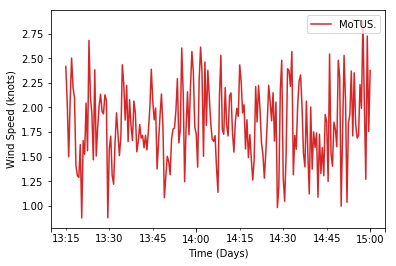

In [8]:
#Plotting graph from Station and MoTUS for wind

color = 'tab:red'
v=mean.plot(label='MoTUS.',color=color)

plt.ylabel('Wind Speed (knots)')
plt.xlabel('Time (Days)')
plt.legend(loc=1)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
#    bottom='True',      # ticks along the bottom edge are off
#    top='True',         # ticks along the top edge are off
    labelright='True') # labels along the bottom edge are off

#Saving figures
plt.savefig('wind_speed.jpg', bbox_inches='tight',dpi=900)